In [2]:
from mnist import MNIST # Hand Written number Dataset
import random # random number generator module
import numpy as np # numpy Module

mndata = MNIST("C:\\Users\\joshua\\ml\\Samples\\")

train_images, train_labels = mndata.load_training()
X_test, y_test = mndata.load_testing()
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
train_images = np.asarray(train_images)
train_labels= np.asarray(train_labels)
print(train_images.shape,"\n",train_labels.shape, "\n", X_test.shape,"\n", y_test)

(60000, 784) 
 (60000,) 
 (10000, 784) 
 [7 2 1 ... 4 5 6]


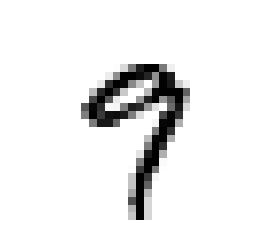

9


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = train_images[36500] #pulls one number from dataset, 728 data floats
some_digit_image = some_digit.reshape(28,28) #shapes data to 28X28 array

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
#prints array plot
plt.axis("off")
plt.show()
print(train_labels[36500])#prints label

In [3]:
shuffle_index = np.random.permutation(60000) #60,000 random numbers
X_train, y_train = train_images[shuffle_index], train_labels[shuffle_index]
#shuffled trained datasets

In [4]:
y_train_9 = (y_train ==9)# true/false array for 9
y_test_9 = (y_test == 9)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_9) #fits Stochastic Gradient Descent model to Y_train_9
sgd_clf.predict([some_digit])  #prints prediction


C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ True])

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold (n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print (n_correct/len(y_pred))
    

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9466


C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.93385


C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.90765


In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, scoring = "accuracy")


from sklearn.base import BaseEstimator
class Never5Classifier (BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_9, cv=3, scoring="accuracy")

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be

array([0.9009 , 0.90005, 0.9016 ])

In [7]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)


from sklearn.metrics import confusion_matrix # shows how many numbers are classified correctly
confusion_matrix(y_train_9, y_train_pred)

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

array([[53664,   387],
       [ 3851,  2098]], dtype=int64)

In [8]:
from sklearn.metrics import precision_score, recall_score

print(precision_score (y_train_9, y_train_pred)) #prints precision
print(recall_score(y_train_9, y_train_pred)) # prints recall

0.8442655935613682
0.35266431332997145


In [9]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred) #creates f1 score

0.4975100782546834

[197065.15551816]
[ True]


C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

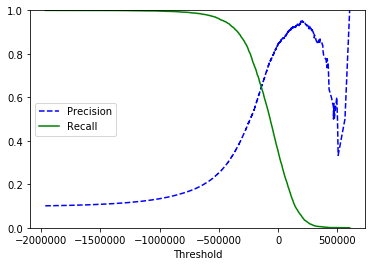

In [13]:
y_scores = sgd_clf.decision_function([some_digit]) # gets the decision function for some number
print(y_scores) #prints scores for decision function

threshold = 50000 #sets threshold

y_some_digit_pred =(y_scores > threshold) #true/false array based on thresholds value

print(y_some_digit_pred)#prints true/false

#update y_scores to cross validation prediction
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3, method = "decision_function")

from sklearn.metrics import precision_recall_curve

#gets the precisions, recalls, thresholds measurements for the recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

#plots the precision against the thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label ="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [15]:
y_train_pred_90 = (y_scores > 70000)
print (precision_score (y_train_9, y_train_pred_90))

print (recall_score(y_train_9, y_train_pred_90))

0.8894297635605007
0.2149941166582619


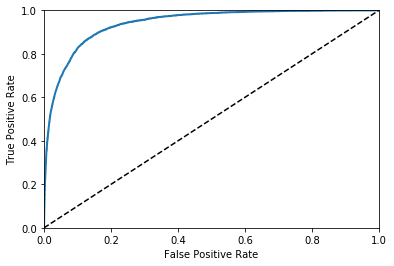

0.9402270504632478

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


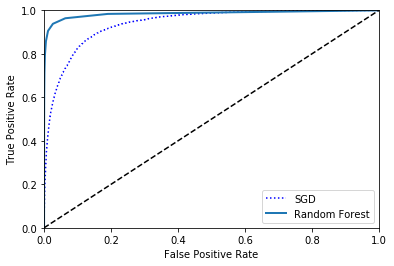

0.985031628064091

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv =3, method="predict_proba")

y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)

plt.plot(fpr,tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()
roc_auc_score(y_train_9, y_scores_forest)


In [23]:
# multiClassifier
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))
some_digit_scores= sgd_clf.decision_function([some_digit])
some_digit_scores

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[9]


array([[-394909.40709135, -535086.26271194, -669757.49980476,
        -373642.30840904, -194417.72598461, -209583.33581022,
        -586743.16063171,    4512.93153909, -133489.45380068,
         197065.15551816]])

In [25]:
print(np.argmax(some_digit_scores))
sgd_clf.classes_

9


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf =OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
len(ovo_clf.estimators_)

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[9]


45

In [28]:
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([some_digit]))

forest_clf.predict_proba([some_digit])

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[9]


array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0.8]])

In [29]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

array([0.86982603, 0.84824241, 0.86542981])

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

array([0.90831834, 0.91109555, 0.91023654])

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

array([[5740,    2,   22,   11,   12,   45,   39,    7,   42,    3],
       [   2, 6470,   42,   30,    5,   41,    6,   10,  124,   12],
       [  61,   39, 5302,  106,   87,   24,   95,   61,  169,   14],
       [  47,   41,  135, 5367,    1,  236,   33,   60,  121,   90],
       [  22,   28,   33,    8, 5394,    7,   49,   29,   89,  183],
       [  74,   36,   30,  192,   75, 4599,  114,   31,  181,   89],
       [  38,   27,   47,    2,   50,   89, 5612,    8,   45,    0],
       [  25,   20,   68,   27,   51,   13,    5, 5818,   17,  221],
       [  57,  148,   65,  161,   11,  153,   53,   25, 5053,  125],
       [  46,   33,   24,   96,  160,   34,    2,  232,   84, 5238]],
      dtype=int64)

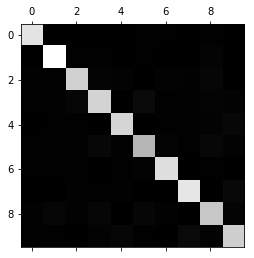

In [33]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

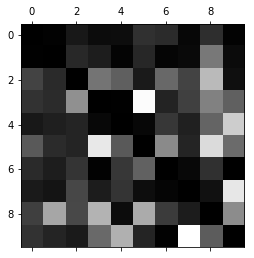

In [41]:
import matplotlib.pyplot as plt
rows_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/rows_sums

np.fill_diagonal(norm_conf_mx,0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
cl_a, cl_b = 8,9
X_aa = X_train[(y_train==cl_a)& (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a)& (y_train_pred == cl_b)]
X_ba = X_train[(y_train==cl_a)& (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b)& (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

array([[ True,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")